In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [4]:
data.groupby('sex')['target'].mean()

sex
0    0.750000
1    0.449275
Name: target, dtype: float64

<Axes: xlabel='target', ylabel='count'>

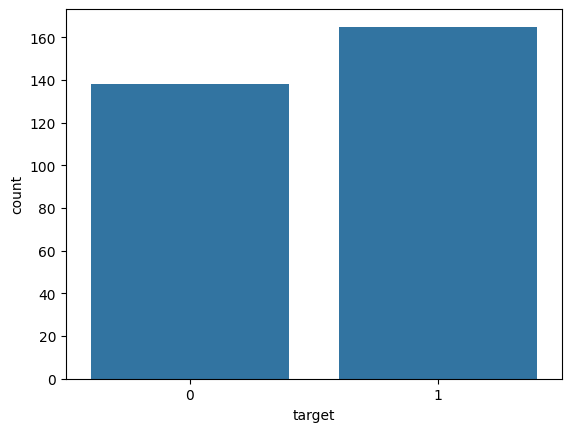

In [5]:
sns.countplot(data=data, x='target')

<Axes: xlabel='sex', ylabel='count'>

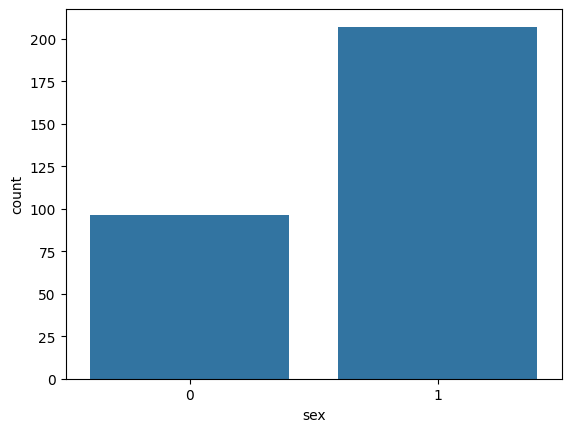

In [6]:
sns.countplot(data=data, x='sex')

<Axes: >

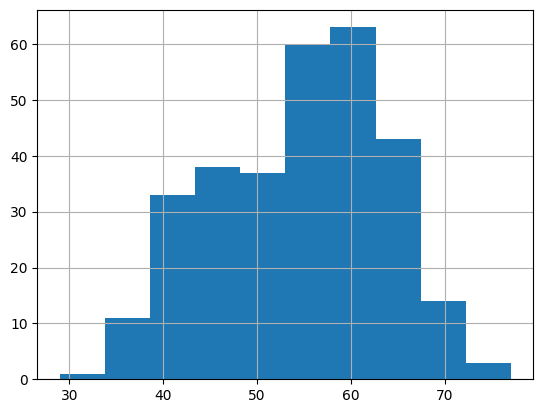

In [7]:
data['age'].hist()

In [8]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [9]:
np.shape(X)

(303, 13)

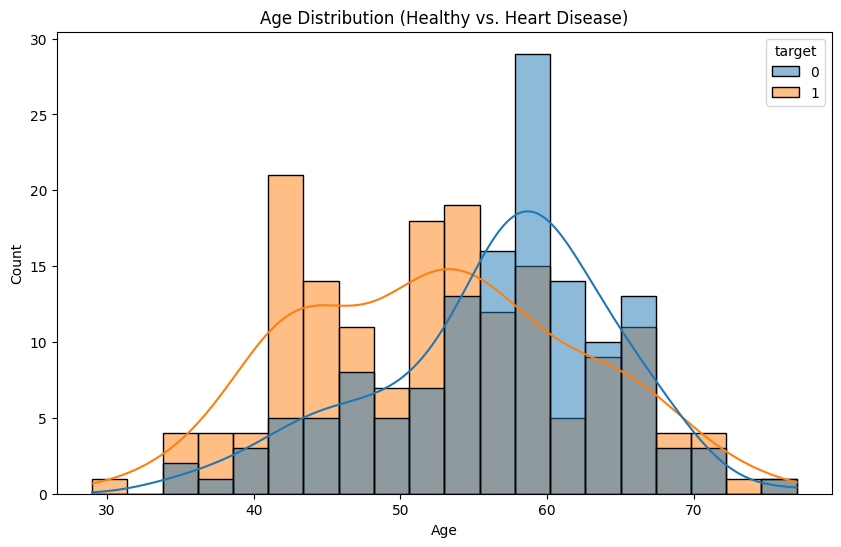

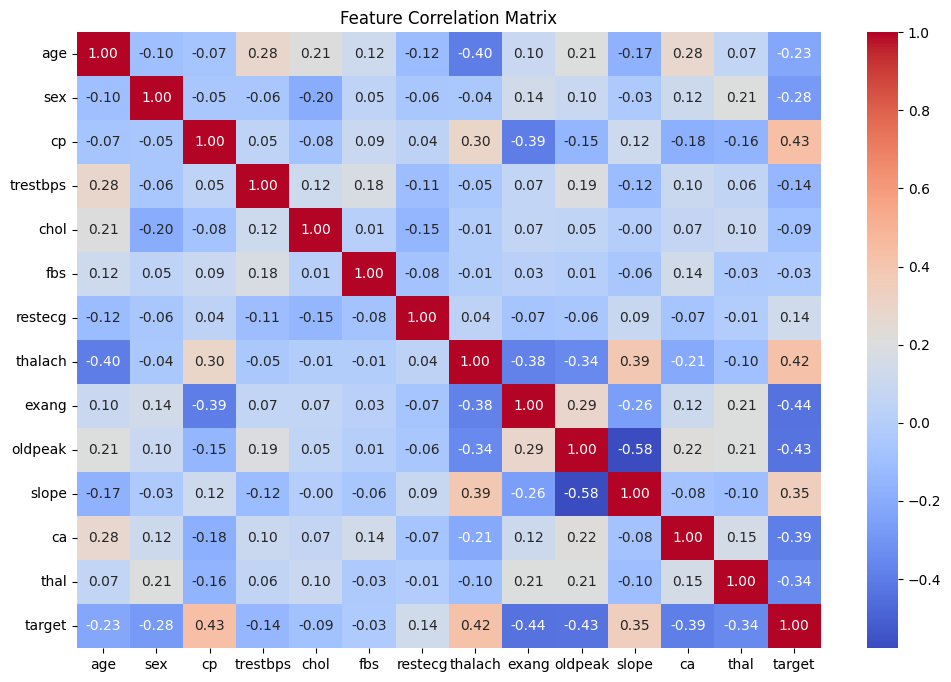

In [10]:
# EDA: Age Distribution by Heart Disease Status
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='target', kde=True, bins=20)
plt.title('Age Distribution (Healthy vs. Heart Disease)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

# pre processing

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=380)

#  make classifier

In [13]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
from sklearn import metrics

In [15]:
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.70      0.65        33
           1       0.74      0.65      0.69        43

    accuracy                           0.67        76
   macro avg       0.67      0.67      0.67        76
weighted avg       0.68      0.67      0.67        76



In [16]:
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66        33
           1       0.73      0.77      0.75        43

    accuracy                           0.71        76
   macro avg       0.71      0.70      0.70        76
weighted avg       0.71      0.71      0.71        76



#  make SVM model

In [17]:
from sklearn.svm import SVC

In [18]:
clf = SVC(C=15, kernel='linear', random_state=3244)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        33
           1       0.87      0.93      0.90        43

    accuracy                           0.88        76
   macro avg       0.88      0.87      0.88        76
weighted avg       0.88      0.88      0.88        76



# Grid Srearch CV

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [20]:
params = {
    'C': [0, 1, 10],
    'kernel': ['linear'],
    'gamma': ['auto', 0.1]
}
gsh = GridSearchCV(SVC(), param_grid=params, scoring='accuracy', cv=2, n_jobs=-1, verbose=10)

In [21]:
gsh.fit(X, y)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


/home/hadis/uni/env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
4 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/home/hadis/uni/env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/hadis/uni/env/lib/python3.11/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/hadis/uni/env/lib/python3.11/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/home/hadis/uni/env/l

GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0, 1, 10], 'gamma': ['auto', 0.1],
                         'kernel': ['linear']},
             scoring='accuracy', verbose=10)

In [22]:
gsh.best_estimator_

SVC(C=1, gamma='auto', kernel='linear')

In [23]:
gsh.best_score_

np.float64(0.8282720460090623)

In [24]:
# gsh.refit()
gsh.predict(X_test)

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

In [25]:
gsh.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}

In [26]:
svc = SVC(C=1, gamma='auto', kernel='linear')
svc.fit(X, y)

SVC(C=1, gamma='auto', kernel='linear')